<a href="https://colab.research.google.com/github/Varshith022006/explanible_ai_lab/blob/main/labexam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Synthetic Radiation Dataset
np.random.seed(42)
rows = 1000

data = pd.DataFrame({
    "radiation_level": np.random.normal(50, 15, rows),
    "temperature": np.random.normal(30, 5, rows),
    "humidity": np.random.normal(70, 10, rows),
    "wind_speed": np.random.normal(10, 3, rows),
    "sensor_age": np.random.randint(1, 10, rows),
    "region_type": np.random.choice(["Urban", "Rural", "Industrial"], rows),
})

# Class label based on radiation level
data["status"] = np.where(data["radiation_level"] > 60, 1, 0)

# Introduce missing values
for col in ["temperature", "humidity"]:
    data.loc[data.sample(frac=0.05).index, col] = np.nan

data.to_csv("radiation_dataset.csv", index=False)
data.head()


,radiation_level,temperature,humidity,wind_speed,sensor_age,region_type,status
0,57.450712,36.996777,63.248217,4.276577,8,Rural,0
1,47.926035,34.623168,68.554813,7.418845,3,Rural,0
2,59.715328,30.298152,62.075801,8.759183,8,Rural,0
3,72.845448,26.765316,66.920385,15.663063,8,Urban,1
4,46.487699,33.491117,51.063853,11.669659,5,Rural,0


In [2]:
data = pd.read_csv("radiation_dataset.csv")

# Impute missing values
data["temperature"].fillna(data["temperature"].mean(), inplace=True)
data["humidity"].fillna(data["humidity"].median(), inplace=True)


/tmp/ipython-input-3936565414.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["temperature"].fillna(data["temperature"].mean(), inplace=True)
/tmp/ipython-input-3936565414.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [23]:
data = pd.read_csv("radiation_dataset.csv")
data = pd.get_dummies(data, columns=["region_type"], drop_first=False)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ["radiation_level","temperature","humidity","wind_speed","sensor_age"]
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [5]:
from imblearn.over_sampling import SMOTE

X = data.drop("status", axis=1)
y = data["status"]

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


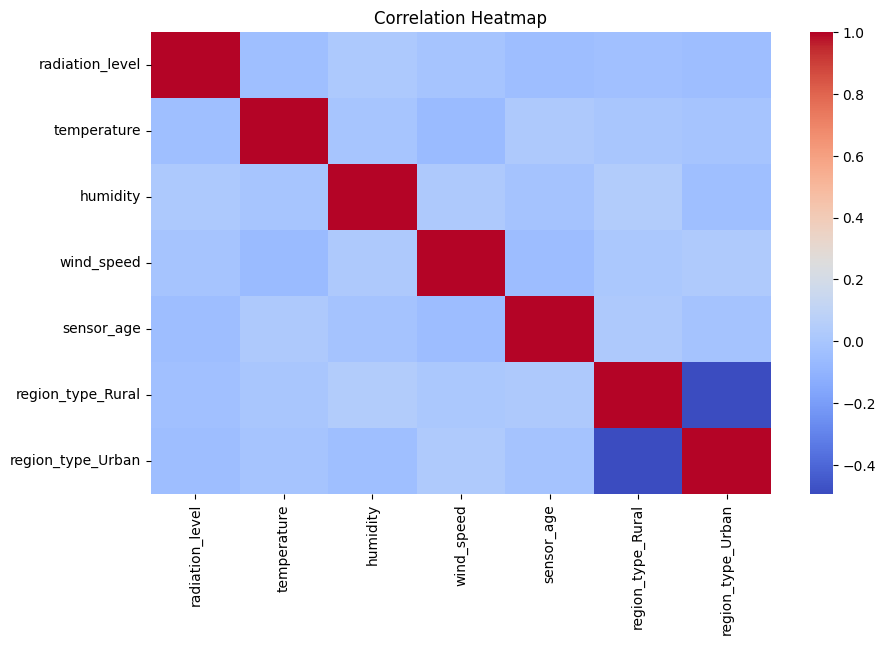

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-3850440985.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values, X_resampled)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


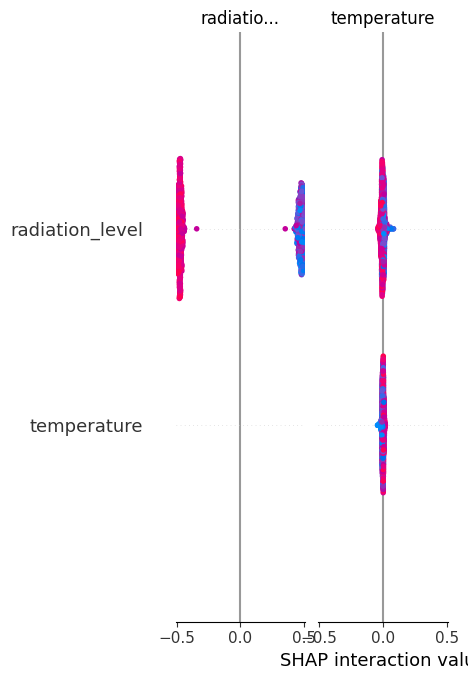

In [9]:
shap_values = explainer(X_resampled)
shap.summary_plot(shap_values.values, X_resampled)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)


In [12]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True)
}

results = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

results


{'Logistic Regression': {'Accuracy': 0.966996699669967,
  'Precision': 0.9391891891891891,
  'Recall': 0.9928571428571429,
  'F1 Score': 0.9652777777777778,
  'AUC': np.float64(0.9973269062226118),
  'Confusion Matrix': array([[154,   9],
         [  1, 139]])},
 'Decision Tree': {'Accuracy': 0.9966996699669967,
  'Precision': 1.0,
  'Recall': 0.9928571428571429,
  'F1 Score': 0.996415770609319,
  'AUC': np.float64(0.9964285714285714),
  'Confusion Matrix': array([[163,   0],
         [  1, 139]])},
 'KNN': {'Accuracy': 0.9141914191419142,
  'Precision': 0.8475609756097561,
  'Recall': 0.9928571428571429,
  'F1 Score': 0.9144736842105263,
  'AUC': np.float64(0.9807624890446978),
  'Confusion Matrix': array([[138,  25],
         [  1, 139]])},
 'Naive Bayes': {'Accuracy': 0.966996699669967,
  'Precision': 0.9391891891891891,
  'Recall': 0.9928571428571429,
  'F1 Score': 0.9652777777777778,
  'AUC': np.float64(0.9987730061349693),
  'Confusion Matrix': array([[154,   9],
         [  1, 1

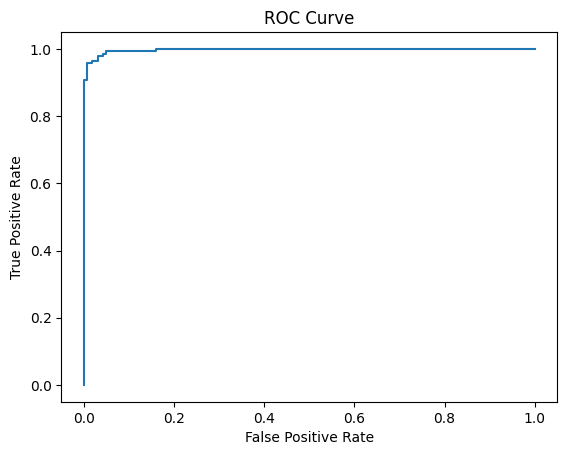

In [13]:
fpr, tpr, _ = roc_curve(y_test, models["Logistic Regression"].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [14]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

ens_models = {
    "Bagging": BaggingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}


In [17]:
!pip install catboost
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

ens_models.update({
    "AdaBoost": AdaBoostClassifier(),
    "GBM": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
})

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00


In [18]:
from sklearn.ensemble import StackingClassifier

stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier()),
        ('knn', KNeighborsClassifier())
    ],
    final_estimator=LogisticRegression()
)

ens_models["Stacking"] = stack_model


In [19]:
ensemble_results = {}

for name, clf in ens_models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]

    ensemble_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    }

ensemble_results


[LightGBM] [Info] Number of positive: 617, number of negative: 594
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 1211, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509496 -> initscore=0.037990
[LightGBM] [Info] Start training from score 0.037990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

{'Bagging': {'Accuracy': 0.9966996699669967,
  'Precision': 1.0,
  'Recall': 0.9928571428571429,
  'F1 Score': 0.996415770609319,
  'AUC': np.float64(1.0)},
 'Random Forest': {'Accuracy': 0.9966996699669967,
  'Precision': 1.0,
  'Recall': 0.9928571428571429,
  'F1 Score': 0.996415770609319,
  'AUC': np.float64(1.0)},
 'Extra Trees': {'Accuracy': 0.9933993399339934,
  'Precision': 0.9859154929577465,
  'Recall': 1.0,
  'F1 Score': 0.9929078014184397,
  'AUC': np.float64(0.9999123575810692)},
 'AdaBoost': {'Accuracy': 0.9966996699669967,
  'Precision': 1.0,
  'Recall': 0.9928571428571429,
  'F1 Score': 0.996415770609319,
  'AUC': np.float64(0.9964285714285714)},
 'GBM': {'Accuracy': 0.9966996699669967,
  'Precision': 1.0,
  'Recall': 0.9928571428571429,
  'F1 Score': 0.996415770609319,
  'AUC': np.float64(0.9964285714285714)},
 'XGBoost': {'Accuracy': 0.9933993399339934,
  'Precision': 1.0,
  'Recall': 0.9857142857142858,
  'F1 Score': 0.9928057553956835,
  'AUC': np.float64(0.999956178

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_dl = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_dl.fit(X_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5531 - loss: 0.6823 - val_accuracy: 0.6173 - val_loss: 0.6709
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6339 - loss: 0.6667 - val_accuracy: 0.6708 - val_loss: 0.6591
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.6497 - val_accuracy: 0.7449 - val_loss: 0.6426
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7805 - loss: 0.6269 - val_accuracy: 0.7531 - val_loss: 0.6187
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7618 - loss: 0.6100 - val_accuracy: 0.7572 - val_loss: 0.5911
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8117 - loss: 0.5636 - val_accuracy: 0.7901 - val_loss: 0.5596
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8069 - loss: 0.5299 - val_accuracy: 0.7942 - val_loss: 0.5297
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8158 - loss: 0.4955 - val_accuracy: 0.8313 - val_loss: 0.4879
Epo

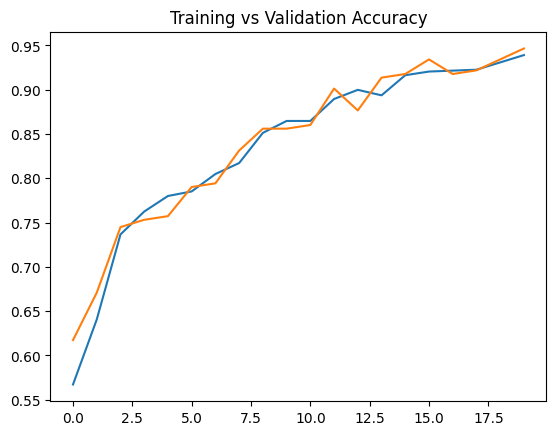

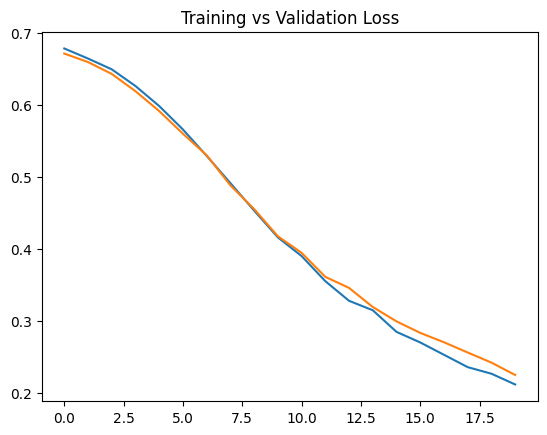

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.show()
